In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
# Import train and test split\
from sklearn.model_selection import train_test_split

# Improt preprocessing module
from sklearn import preprocessing

# Import Random Forest
from sklearn.ensemble import RandomForestRegressor

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics for model performance
from sklearn.metrics import mean_squared_error, r2_score

# Import module for storing arrays
import joblib

from sklearn.neighbors import KNeighborsClassifier

from scipy import stats as ss

import collections as co

# Specials.
import scipy.special as spec


***

# SciKit-Learn Overview

<br>

## Introduction

<br>

Scikit-learn, or 'Sklearn', is an open source and commercially usable machine learning library within Python. The library is built upon Numpy and SciPy to carry out a variety of essential machine learning processes. 

The type of machine learning carried out by Sklearn is broadly separated into two categories: **supervised machine learning** and **unsupervised machine learning**.

<br>

***

## Supervised Machine Learning

In Supervised Machine Learning, or 'SML', the data being used is labeled. There is an input variable, 'X', and an output variable, 'Y', and you use an algorithm to learn the mapping from the output to the input. 

The data scientist oversees the algorithms that are used in SML by creating a model. The data is split into training and testing data and using this trained data, the model is 'supervised'. Essentially, the model iteratively learns to carry out accurate predictions or classifications. The algorithm eventually reaches an acceptable level of accuracy. The data scientist oversees this process, and using a number of tools (helper functions within Sklearn for example), decides if the model that has learned from the trained data is accurate,

Specific algorithms are utilised on this labeled data, different to those that we could use on unlabelled. 

#### Reference: https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

#### References: https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/

<br>

***

## Unsupervised Machine Learning

In Unsupervised Machine Learning ('UML'), there is an input variable, 'X', but no output variables. We much instead rely upon Sklearn algorithms that can investigate the existing data and derive learnings from this alone, by investigating patterns existing in the data.

UML can be generally sub-divided into two problem solving methods: **clusering** and **Association**. 

In clustering, algorithms are used to study patterns that suggest there are groups within the unlabelled data. In this case, the algorithm looks groups of datapoints that are clustered according to some variables. An example application of clustering is in *churn prediction*, where a company may want to study the period of time it takes subscribers to unsubscribe. 

Association is where algorithms look at data and learn patterns that describe large portions of data. For example, people who unsubscribe from a service within the first month, also tended to not have received email prompts offering discounts. This is not investigating the data as being comprised of identifiable clusters, but rather as having an overall trend that can be of value. 

<br>

***

## Sklearn Algorithms

Sklearn is broadly separated into 6 areas of Machine Learning:

* Classification
* Regression
* Dimensionality Reduction
* Clustering
* Model Selection
* Preprocessing

**Classification** and **Regression** are Supervised Machine Learning problems.

**Clustering** and **Dimensionality Reduction** are Unsupervised problems. 

**Preprocessing** and **Model Selection** are processes that can be applied to both SML and UML problems.

It is important to get an understanding of each of these algorithms and how they work.

<br>

### 1. Classification

Classification is a SML problem that involves investigating data and identifying which category it belongs to. 

Take for example the Diet dataset that we will look at in the Scipy.Stats notebook. This contains an independent variable, 'Diet' - which contains three categories, each one representing a different diet. It also contains a dependent variable, which is the weight change measured after 6 weeks on the diet. 

that is comprised of an independent variable and a dependent variable

In [40]:
df = pd.read_csv('diet_BMI_incl.csv')
Diet = df['Diet']
BMI = df['BMI_change']
#Gender = df['gender']
#Age = df['Age']
Height = df['Height']

c:\users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


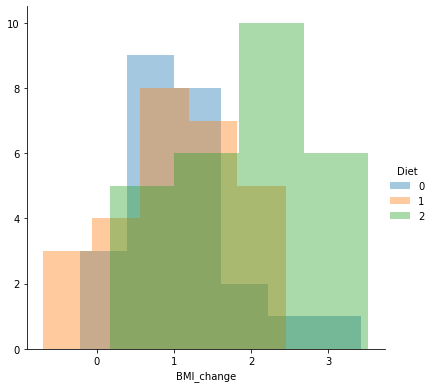

In [31]:
sns.FacetGrid(df,hue='Diet',height=5.5).map(sns.distplot,'BMI_change', kde=False).add_legend()
#sns.scatterplot(x=BMI, y=Diet, hue=Diet, data=df)

From the above plot we see the BMI histograms for the three diet groups. We notice that there is a large degree of overlap between diet 0 and diet 1. However, we notice that there appears to be a large degree of diet 2 vectors that is differentiated from the other two groups.

#### Classification Problem:

You are presented with a number of BMI_change datapoints, but are not told which category of diet they relate to. In this case you could use Classification algorithms to determine which diet the measurement relates to.

In this example you are given a measurement of 3% BMI_change. A Classification algorithm such as *K-nearest neighbor* (sklearn.neighbors.KNeighborsClassifier) in order to determine what diet was most likely. In this case, it would be necessary to use the KNN algorithm on bivariate data (by plotting Height by BMI_Change, for example).

We will look more at this type of algorithm later.

***

### 2. Regression

Regression is the second Supervised Machine Learning problem that Sklearn addresses. Regression is the measure of the mean of one value, the output, and the corresponding value of the other values.

Take for example the Powerproduction dataset. This data contains two features. The independent variable is 'speed' and the dependent variable is power.

#### Regression Problem

There is a desired to understand for each measure of Speed, what the corresponding Power measure will be.

By carrying out Polynomial regression on this dataset, we can draw a 'line of best fit' through the data. This is a line that fits through the spread of data vectors, whereby, the combined distance from each point to the line is at it's lowest. This is known as calculating the cost of the line.

Below, a mapping function containing SciPy's curve_fit() function shows the desired effect of Regression. This is for demonstration purposes only, as can be seen in the line between the measure of 'Speed' of 7 and 10, the line does not fit very well in this area. The regression that will take place later in this project will use trained data and will be more accurate.

In [43]:
df = pd.read_csv("powerproduction.txt")

In [45]:
from scipy.optimize import curve_fit


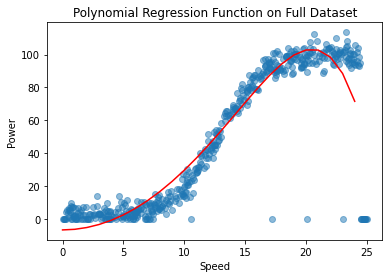

In [46]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = df["speed"], df["power"]
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y, alpha=0.5)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, color='red')
plt.title("Polynomial Regression Function on Full Dataset")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()

***

### Clustering




#### Classification
Identifying which category an object belongs to
E.g. Spam detection

#### Regression
Predicting an attribute associated with an object
E.g. Stock prices prediction - what is a stock going to be worth tomorrow?
E.g. weather

#### Clustering
Taking an automatic grouping of similar objects into sets
E.g. Customer segmentation

#### Model Selection
Comparing, validating and choosing parameters and models.
E.g. Imporving model accuracy via parameter tuning

#### Dimesionality Reduction
Reducing the number of random variables to consifer
E.g. To increase model efficiency

#### Pre-processing
Feature extraction and normalisation
E.g. Transforming input data such as text for use in machine learning algorithms

SciKit learn works on NUmpy arrays - homogenous arrays - have one datatype - different from DataFrames

We assume that our input data is a matrix where Each row corresponds to one sample and each column corresponds to one feature

In classification or regression, outputs or labels - different objects one for data and one for targets

Most of the algorithms in sklearn assume that everything is a float - by default none of these work with categorical variables or missing values - this must be kept in mind

### Supervised Machine Learning

#### Machine learning pipeline:

INSERT Supervised Machine Learning Image::

clf = RandomForestClassifier()

The above is an example is an object that encapsulates the algorithm for building the model and for making predictions - it will also store all the model parameters/

If you call clf.fit() - this will build the model and store all the trees and the splits of the trees, from the RandomForestClassifier.

All models have this fit() function and looks the same way - always get the training data (x_train), and if it's a supervised algorithm it also gets the outputs, y_train.

If you apply the new data, you use clf.predict() on the object - you can use any new data you have, and it will return the predicions according to the model.

There is also the score() function, which is a helper function that has both the prediction and it evaluates against some known truths - to provide information on the accuracy of the model.

This is the most common interface for Sklearn and all models for regression and classification will follow it.

Fit() and Predict() are the core methods, used on the object, clf.**

### Unsupervised Learning

This is another interface in SKlearn, in unsupervised learning and preprocessing, where somebody gives you a trained dataset and you want to do a principle component analysis (PCA_.

You have training data, you have no labels or known truths - you just have your matrix, 'x' and you build your model from this.

Then when you get new data, or have your test data - you want to apply this model and it will give you a new view of the data.

For example,a 'projection' onto the principle components. THis is a different task and it has a different interface...

pca = PCA()

pca.fit(X_train)

X_new = pca.transform(X_Test)

Everything is encapsulated as an object - we instantiate the pca object - we call fit() again, give it the training data, x, because it is an unsupervalised method. 

If we then want to project to the principle components, we use the transform() method on any data, this will give you the new view of the data.


***

## Basic API of Unsupervised Learning

<br>

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;estimator.fit(X, [y]) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | 
| :---| :--- | 
| **estimator.predict()** | **estimator.transform** | 
|  Classification | Presprocessing   | 
| Regression  | Dimensionality Reduction | 
| Clustering |Feature selection |    
|    | Feature extraction   |   
|   | 	   |
| |  | 

In the table above - estimators is a term for the model. It can refer to anything: like a classifier (e.g. RandomForest()) or a scaling method (e.g. StandardScaler()).

When using the predict() method to make a prediction, estimators always take the data, 'x', and if it's a supervised mathod, it takes a target output, 'y'.

We use the transform() method when you need a new view. For classification, regression or clustering, you use the transfer() method and if you want a new view, you use the transfer method on 'x' (new data). THis is used for preprocessing, dimensionality reduction, feature selection and feature extraction.

This covers our two building blocks for unsupervised learning - transforming your data and making predictions.

***

## Model Evaluation and Selection

<br>

There are a number of concepts to grasp within model selection and evaluation. Sklearn uses a number of methods to carry out these two processes.

#### Two Examples:

##### train_test_split
When using train_test_splt - you use cross-validation. This is where you use 5 folds (5 splits) and this gives you a more robust estimate on the generalisation performance of your model.

##### cross_val_score
You can use cross_val_score() function to get an object, data and labels and input how much cross validation to use (3 fold, five fold etc). This function will return the scores on the 'holdut' set for each evaluation. For 5 folds, you will get 5 scores. You can then calculate the mean of the 5 scores.

Iyt is important to remember that all models have parameters, and that you need to tune them. You take data, do train_test_split, you cross evaluate on the training data, in order to tune the parameters. You can then do a final evaluation of your test data. This gives you an unbiased evaluation of the generalisation performance.

Just doing cross-validation to tune parameters, your estimate may be too 'optimistic'.

##### Cross-validation Grid Search
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split

X_train_X_test, y_train, y_test = train_test_split(X, y)

params_grid = {'C':10, ** np.arange(-3, 3),
                'gamma': 10, ** np.arange(-3,3)}
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
grid.predict(X_test)
grid.score(X_test, y_test)

GridSearchCV implements GridSearch with cross-validation
                






Sklearn doesn't automatically do any preprocessing because you won't have control over how to preprocess. Such as how to encode variables or how to compute data.

More often than not, before you build your model from the training labels and training data, you are taking extra steps in between such as feature extraction, scaling and feature selection - when these steps have been implemented, they are included in the model.

Cross-validation should happen on the whole processing pipeline, from feature extraction to feature selection

<img src="https://www.kdnuggets.com/wp-content/uploads/train_test_split.jpg" style="width: 450px;">

##### Pipelines

Similar to cross-validation, pipelines are a way to chain together transformations with the classifier. Making a Pipeline returns an object that is an estimator with the same interface as the other models.

The pipeline therefore, looks like a model - except it includes some transformations with a classifier.

Take for example, a pipeline that includes two transformations and one classifier. When .fit() is called on this model, it will transform using the first transformation, then fit the second transformation and then transform using the second transformation - it will then pass the transformed data onto the classifier.

Using a preprocessing pipeline like this, will make it much more likely that you are not leaking information from your test set or that you're taking different actions on the test and training data. The pipeline encapsulates the data and standardises the processing of the data.

Take scaling for example, the StandardScaler() function can be used inside

## What is Sklearn

Sklearn is a simple and efficient tool for data mining and analysis.

It is built on Numpy, SciPy and Matplotlib.

It is an open source and commercially usable package.

### What can we achieve using it?

#### Classification
Identifying which category an object belongs to
E.g. Spam detection

#### Regression
Predicting an attribute associated with an object
E.g. Stock prices prediction - what is a stock going to be worth tomorrow?
E.g. weather

#### Clustering
Taking an automatic grouping of similar objects into sets
E.g. Customer segmentation

#### Model Selection
Comparing, validating and choosing parameters and models.
E.g. Imporving model accuracy via parameter tuning

#### Dimesionality Reduction
Reducing the number of random variables to consifer
E.g. To increase model efficiency

#### Pre-processing
Feature extraction and normalisation
E.g. Transforming input data such as text for use in machine learning algorithms



|  | Data Used |Coef. |R²| Std.Err.*(x1)* | p-value*(x1)*  | t-value*(x1)*    | H0 Rejected |    | 
| :---| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Simple Linear Regression**   |   |    |    |    |    |   |    |      |
|  *polyfit() Method* |Full Data | [4.917, -13.899] | 72.9%| ✘| ✘|✘ |✘  | 
| *Sklearn Model*  | Train/Test | 4.866 |   74.6% |0.055  |0.00 |19.128| ✔| 
|  | |    |    |   |   |    |    |   |  
|  **Polynomial Regression**   |    |    |    |   |   |    |    |   |  
| *curve_fit() Method*  | Full Data	   |[-0.0, 0.367. -6.771]  |91.1% |✘   |✘   | ✘   | ✘| 
| *Sklearn Model* |  Train Test | [-13.332,   1.937,  -0.053] | 88.1% | 0.019  | 0.00  |52.499   | ✔| 